# CareerVillage Project :

- He U.S. has almost 500 students for every guidance counselor. Underserved youth lack the network to find their career role models, making CareerVillage.org the only option for millions of young people in America and around the globe with nowhere else to turn.

- To date, 25,000 volunteers have created profiles and opted in to receive emails when a career question is a good fit for them. This is where your skills come in. To help students get the advice they need, the team at CareerVillage.org needs to be able to send the right questions to the right volunteers. The notifications sent to volunteers seem to have the greatest impact on how many questions are answered.

## Your objective: 

- Give the insights of the data

## Description about data :

- answers.csv: Answers are what this is all about! Answers get posted in response to questions. Answers can only be posted by users who are registered as Professionals. However, if someone has changed their registration type after joining, they may show up as the author of an Answer even if they are no longer a Professional.

- comments.csv: Comments can be made on Answers or Questions. We refer to whichever the comment is posted to as the "parent" of that comment. Comments can be posted by any type of user. Our favorite comments tend to have "Thank you" in them :)

- emails.csv: Each email corresponds to one specific email to one specific recipient. The frequency_level refers to the type of email template which includes immediate emails sent right after a question is asked, daily digests, and weekly digests.

- group_memberships.csv: Any type of user can join any group. There are only a handful of groups so far.

- groups.csv: Each group has a "type". For privacy reasons we have to leave the group names off.

- matches.csv: Each row tells you which questions were included in emails. If an email contains only one question, that email's ID will show up here only once. If an email contains 10 questions, that email's ID would show up here 10 times.

- professionals.csv: We call our volunteers "Professionals", but we might as well call them Superheroes. They're the grown ups who volunteer their time to answer questions on the site.

- questions.csv: Questions get posted by students. Sometimes they're very advanced. Sometimes they're just getting started. It's all fair game, as long as it's relevant to the student's future professional success.

- school_memberships.csv: Just like group_memberships, but for schools instead.

- students.csv: Students are the most important people on CareerVillage.org. They tend to range in age from about 14 to 24. They're all over the world, and they're the reason we exist!

- tag_questions.csv: Every question can be hashtagged. We track the hashtag-to-question pairings, and put them into this file.

- tag_users.csv: Users of any type can follow a hashtag. This shows you which hashtags each user follows.

- tags.csv: Each tag gets a name.

- question_scores.csv: "Hearts" scores for each question.

- answer_scores.csv: "Hearts" scores for each answer.

# Import necessary librabries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [50]:
import warnings
warnings.filterwarnings('ignore')

# Import dataset to pandas dataframe

In [3]:
answers = pd.read_csv('answers.csv')
answer_scores = pd.read_csv('answer_scores.csv')
comments = pd.read_csv('comments.csv')
emails = pd.read_csv('emails.csv')
groups = pd.read_csv('groups.csv')
group_memberships = pd.read_csv('group_memberships.csv')
matches = pd.read_csv('matches.csv')
professionals = pd.read_csv('professionals.csv')
questions = pd.read_csv('questions.csv')
question_scores = pd.read_csv('question_scores.csv') 
school_memberships = pd.read_csv('school_memberships.csv')
students = pd.read_csv('students.csv')
tags = pd.read_csv('tags.csv')
tag_questions = pd.read_csv('tag_questions.csv')
tag_users = pd.read_csv('tag_users.csv')

## As soon as you import dataset convert datetime to pandas date and time

In [4]:
answers['answers_date_added'] = pd.to_datetime(answers['answers_date_added'], infer_datetime_format=True)
comments['comments_date_added'] = pd.to_datetime(comments['comments_date_added'], infer_datetime_format=True)
emails['emails_date_sent'] = pd.to_datetime(emails['emails_date_sent'], infer_datetime_format=True)
professionals['professionals_date_joined'] = pd.to_datetime(professionals['professionals_date_joined'], infer_datetime_format=True)
questions['questions_date_added'] = pd.to_datetime(questions['questions_date_added'], infer_datetime_format=True)
students['students_date_joined'] = pd.to_datetime(students['students_date_joined'], infer_datetime_format=True)

## Let's first test on smaller dataset

In [5]:
people = {
    "Id" : [1,2,3],
    "Name" : ["hk", "Dk", "Pk"],
    "Score" : [90, 80, 30],
    "Age" : [21, 22, 19]
}
df1 = pd.DataFrame(people)
passed = {
    "Id" : [1,2],
    "Passed" : [1,1]
}
df2 = pd.DataFrame(passed)

In [6]:
df = df1.merge(right=df2, how='inner', left_on='Id', right_on="Id")

In [7]:
df

,Id,Name,Score,Age,Passed
0,1,hk,90,21,1
1,2,Dk,80,22,1


## Perform on actual dataset

Merge datasets

In [8]:
#Merge questions and answers
que_ans = questions.merge(right=answers, how='inner', left_on='questions_id', right_on='answers_question_id')

#Merge students and questions
stud_que = students.merge(right=questions, how='inner', left_on='students_id', right_on='questions_author_id')

#Merge questions,answers and professionals
que_ans_prof = que_ans.merge(right=professionals, how='inner', left_on='answers_author_id', right_on='professionals_id')

# Result - 1 :  Location being important part of dataset

Both types of users highly use location. As we will see later on, there is some location based correlation between students and professionals in terms of answered questions. Also, it's reasonable, because lot's of career questions are location dependent.

In [55]:
## Styling plots
plt.style.use("seaborn")

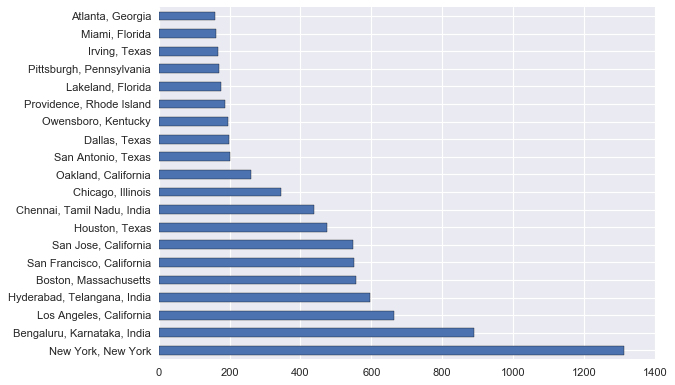

In [56]:
students.students_location.value_counts().head(20).plot(kind='barh')

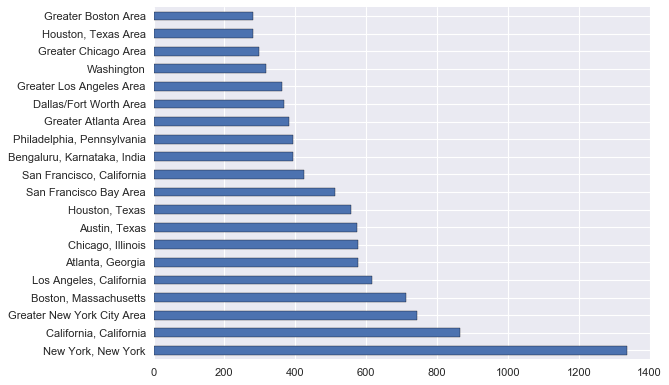

In [57]:
professionals.professionals_location.value_counts().head(20).plot(kind='barh')

### Advanced Version

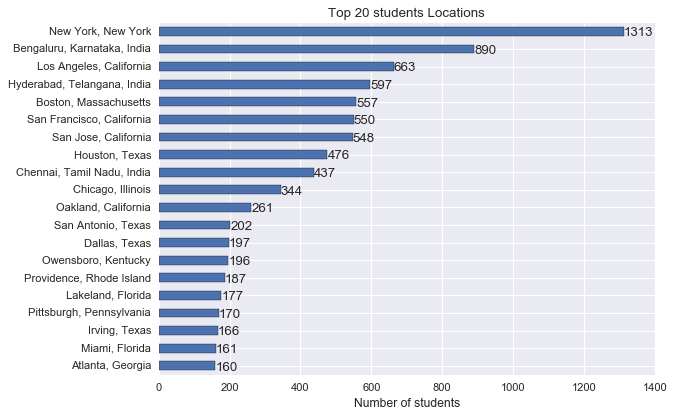

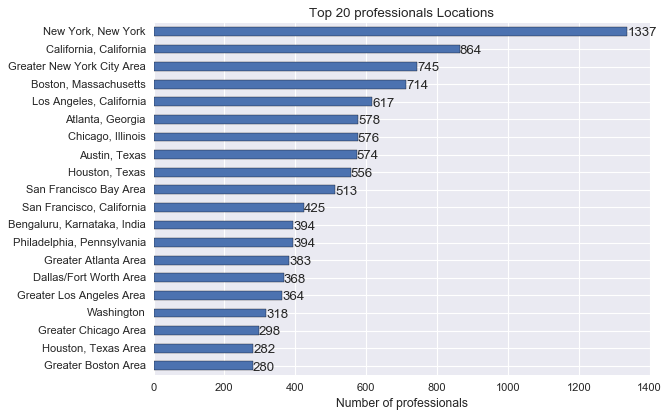

In [59]:
n_locations = 20 

users = [
    ('students' , students),
    ('professionals' , professionals)
]


for user, df in users:
    location = df['{}_location'.format(user)].value_counts().sort_values(ascending=True).tail(n_locations)
    ax = location.plot(kind='barh')
    ax.set_title('Top %s {} Locations'.format(user) %n_locations)
    ax.set_xlabel('Number of {}'.format(user))
    #Adding numbers at the end of bar to indicate the count
    for p in ax.patches:
        ax.annotate(str(p.get_width()), (p.get_width(), p.get_y()))
    plt.show()

# Result - 2 :Users Growth Dynamics

This shows us that growth is stable which is suitable for improvement recommendations.

In [110]:
#Style Plots
plt.style.use('seaborn')

In [65]:
years = students['students_date_joined'].dt.year.unique()
years.sort()
years

array([2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019], dtype=int64)

In [99]:
amounts = [len(students[students['students_date_joined'].dt.year == y]) for y in years]
amounts

[2, 453, 570, 1722, 2576, 12108, 5535, 7748, 257]

### Number of students joined in each year

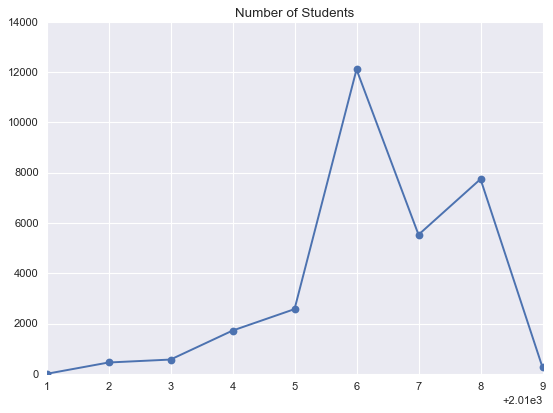

In [103]:
plt.plot(years, amounts, marker='o')
plt.title('Number of Students')
plt.show()

### Number of increased students per year

In [101]:
amounts1 = amounts.copy()
for i in range(len(amounts)):
        if i > 0:
            amounts1[i] += amounts1[i - 1]
amounts1

[2, 455, 1025, 2747, 5323, 17431, 22966, 30714, 30971]

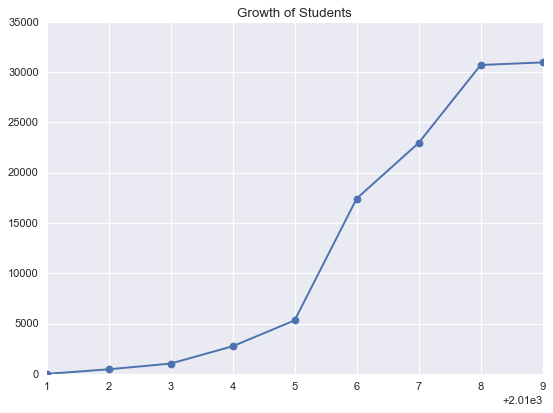

In [102]:
plt.plot(years, amounts1, marker='o')
plt.title('Growth of Students')
plt.show()

### Advanced Version

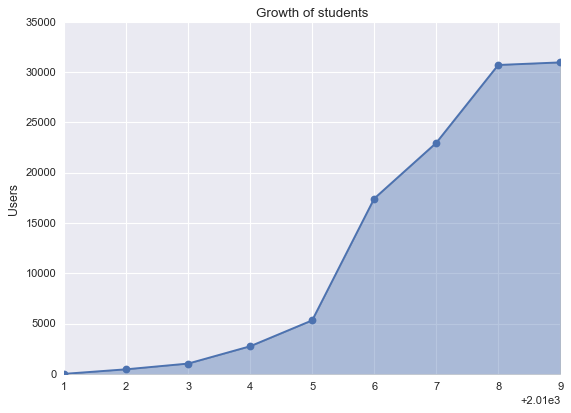

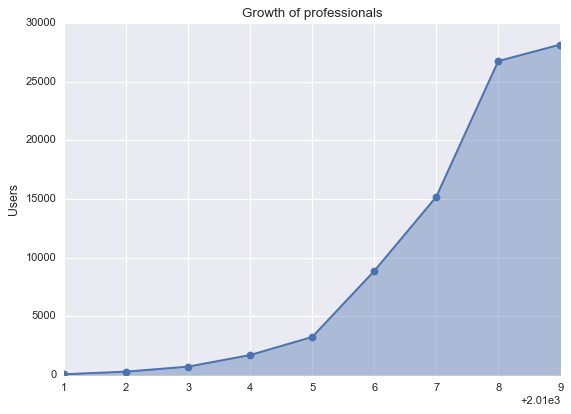

In [112]:
users = [
    ('students', students),
    ('professionals', professionals)
]

for user, df in users:
    years = df['{}_date_joined'.format(user)].dt.year.unique()
    years.sort()
    
    amounts2 = [len(df[df['{}_date_joined'.format(user)].dt.year == y]) for y in years]
    
    for i in range(len(amounts2)):
        if i > 0:
            amounts2[i] += amounts2[i-1]
            
    plt.plot(years, amounts2, marker='o')
    plt.fill_between(years, amounts2, alpha = 0.4)
    plt.ylabel('Users')
    plt.title('Growth of {}'.format(user))
    plt.show()

## Result - 3 : Almost 96.5% of questions were answered

In [17]:
que_ans.questions_id.unique().shape

(23110,)

In [18]:
questions.questions_id.unique().shape

(23931,)

In [19]:
23110/23931 * 100

96.56930341398187

## Result - 4 : Number of Answeres and Questions added per year

In [113]:
temp = questions

In [114]:
temp['Year'] = temp['questions_date_added'].dt.year

In [115]:
temp.groupby('Year').size()

Year
2011      29
2012     435
2013     157
2014    1007
2015    1466
2016    9281
2017    3255
2018    7994
2019     307
dtype: int64

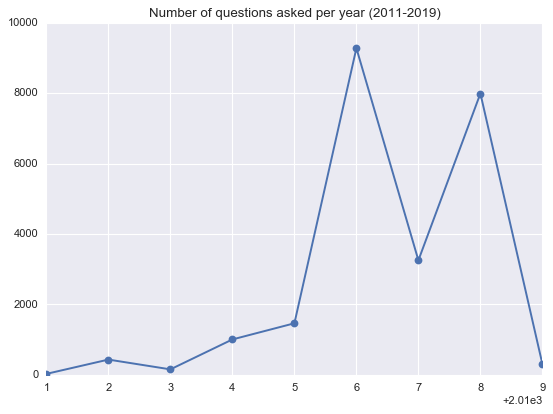

In [119]:
plt.plot(temp.groupby('Year').size(), marker='o')
plt.title('Number of questions asked per year (2011-2019)')
plt.show()

### Advanced Version

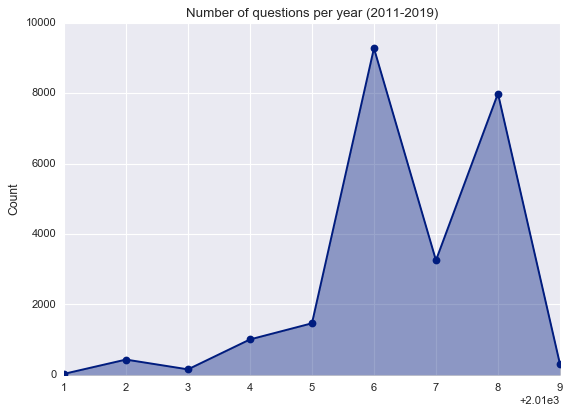

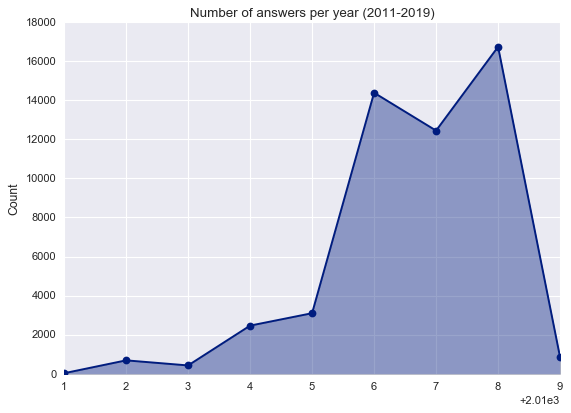

In [126]:
plt.style.use('seaborn-dark-palette')
entities = [
    ('questions', questions),
    ('answers', answers)
]

for entity, df in entities:
    df['year'] = df['{}_date_added'.format(entity)].dt.year
    plt_data = df.groupby('year').size()
    plt.plot(plt_data, marker='o')
    x = plt_data.reset_index()['year']
    y = plt_data.reset_index()[0]
    plt.fill_between(x, y, alpha=0.4)
    plt.ylabel('Count')
    plt.title('Number of {} per year (2011-2019)'.format(entity))
    plt.show()

## Result - 5 : Number of questions asked by users
Students are usually asking one or two questions.

In [132]:
stud_que.groupby(['students_id'])['questions_id'].size().value_counts()

1     5811
2     5110
3      639
4      304
6      102
5       88
7       50
10      47
8       25
9       23
11      18
12      11
13       9
20       7
14       6
17       5
15       5
19       3
30       3
40       3
28       3
18       3
16       3
22       2
29       2
27       2
21       2
23       2
24       2
72       1
41       1
48       1
93       1
73       1
38       1
26       1
77       1
35       1
43       1
36       1
84       1
45       1
71       1
Name: questions_id, dtype: int64

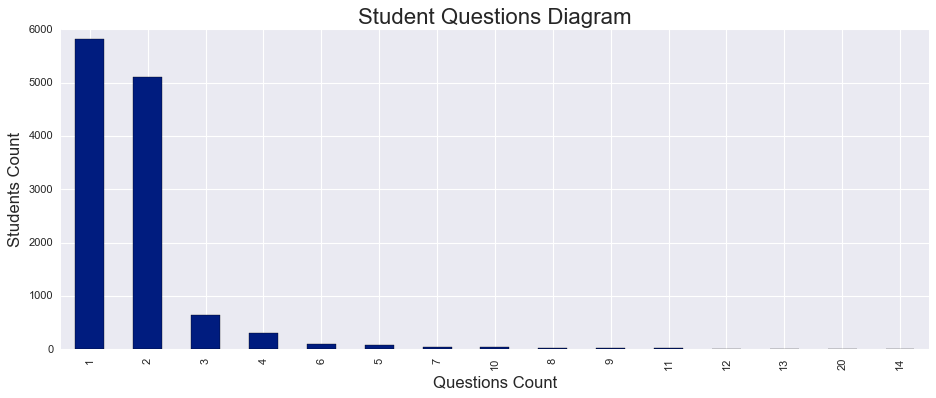

In [162]:
stud_que.groupby(['students_id'])['questions_id'].size().value_counts().head(15).plot(kind='bar', figsize=(14, 5))
plt.xlabel('Questions Count', fontsize=15)
plt.ylabel('Students Count', fontsize=15)
plt.title('Student Questions Diagram', fontsize=20)
plt.show()

## Result - 6 : Number of answers Answered by Professionals
Professionals are usually answering only one question. It can be caused by not sufficient feedback from students.

In [152]:
que_ans_prof.groupby(['professionals_id'])['answers_id'].size().value_counts()

1       4225
2       1862
3       1084
4        652
5        478
6        318
7        207
8        157
10       135
9        115
12        94
11        92
13        65
14        54
15        40
16        37
19        36
17        32
18        30
20        27
24        24
21        23
23        20
25        14
28        12
22        11
36        10
33        10
29        10
26         9
        ... 
144        1
104        1
79         1
96         1
46         1
39         1
56         1
63         1
119        1
1710       1
210        1
133        1
76         1
90         1
74         1
159        1
91         1
99         1
259        1
915        1
84         1
106        1
217        1
153        1
137        1
97         1
89         1
188        1
65         1
711        1
Name: answers_id, Length: 104, dtype: int64

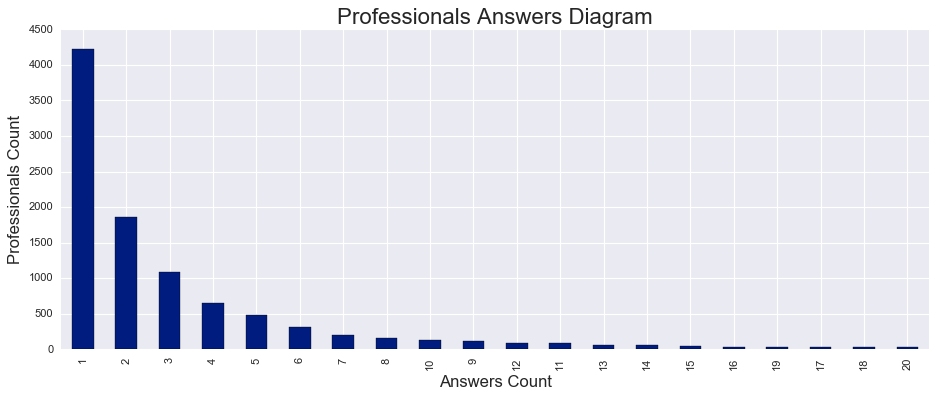

In [161]:
que_ans_prof.groupby(['professionals_id'])['answers_id'].size().value_counts().head(20).plot(kind='bar', figsize=(14, 5))
plt.xlabel('Answers Count', fontsize=15)
plt.ylabel('Professionals Count', fontsize=15)
plt.title('Professionals Answers Diagram', fontsize=20)
plt.show()

## Result - 7 : Top n Students with most Questions
The distribution of students with the highest amount of questions is quite linear. 6 of these curious students asked more than 70 questions, and 4 students asked more than 40 questions.

In [158]:
stud_que.groupby(['students_id'])['questions_id'].size().sort_values(ascending=False)

students_id
2fe767de78fa4dfd83f0021cf7712064    93
45852d7b04fd40a0b8e3d92c8a37aad0    84
867e779f9dad4020925e986151ca4be4    77
83f2f05cbbfe4b8c88b9758c15ab803a    73
0a49a80de472412988aac14f93b06374    72
ef401e9115574bad94b773b4244f37cc    71
803037dbdf424a13895161723fb1e88a    48
94cf86c4b2ed40d6ad21cfd3f8b01ece    45
b4656e510759496fb570b582b803a54e    43
eb49a3a84aba4dd1bd7671860e007fa2    41
93a6e5aaee534a88a7247314f7e4804b    40
ba21c5c24fd3472e9748fd8406f941c0    40
0687c8842a654f1baedce198596f04f2    40
c8242d8fc0c942d2b6dc87829f3e27cc    38
b3e4125677e84e77922a562686d8e161    36
36fb469b197b439aa283053c4570349f    35
690e7e01008b472d839fb2ceb1823860    30
c17fb778ae734737b08f607e75a87460    30
658fcec53ccd49c7afe79e0816a2bbcf    30
8eb0910d7d4141318b1424c0bb7907c9    29
a004fd67683e45ec84e17c552e306031    29
2cf11a324cca4a649b05d8d80729f4a8    28
b3bc740ed50849f1bb58afc0860106d4    28
16908136951a48ed942738822cedd5c2    28
a527b1588d724854a8dbafaf39421f13    27
0d459058e7924

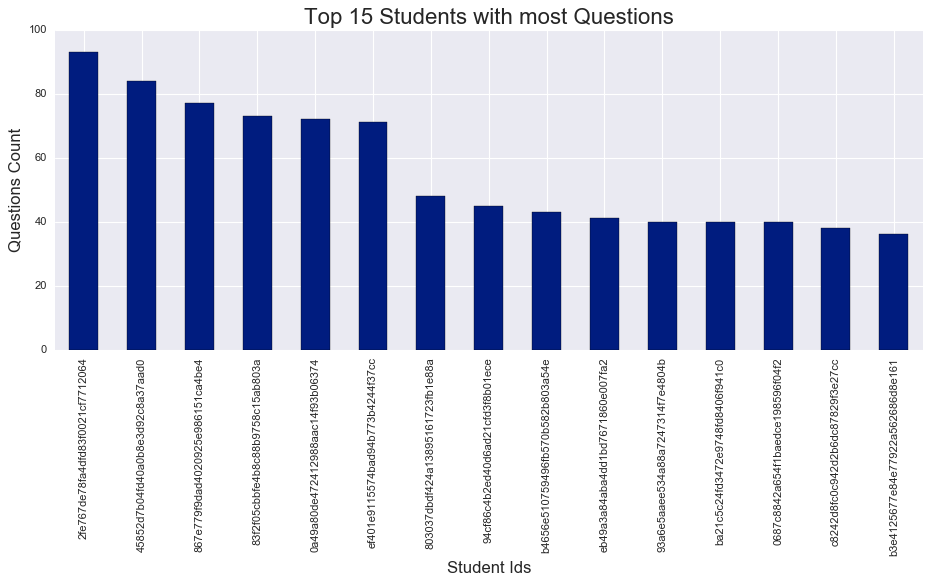

In [164]:
stud_que.groupby(['students_id'])['questions_id'].size().sort_values(ascending=False).head(15).plot(kind='bar', figsize=(14, 5))
plt.xlabel('Student Ids', fontsize=15)
plt.ylabel('Questions Count', fontsize=15)
plt.title('Top 15 Students with most Questions', fontsize=20)
plt.show()

## Result - 8 : Top n Professionals with most Answers
The distribution of professionals with the highest amount of answers is fascinating. Some ultimate professionals answered more than a thousand questions - the platform contains 51123 answers, and those people added almost 14% of them (7073)!

In [167]:
que_ans_prof.groupby(['professionals_id'])['answers_id'].size().sort_values(ascending=False)

professionals_id
36ff3b3666df400f956f8335cf53e09e    1710
58fa5e95fe9e480a9349bbb1d7faaddb    1112
a1006e6a58a0447592e2435caa230f78     915
be5d23056fcb4f1287c823beec5291e1     711
05ab77d4c6a141b999044ebbf5415b0d     616
369f1c8646b649f6997eae7809696bd5     406
a6d33c38902546849c36ea7e9e9f0870     259
4dc61581ec7b409bbd037e483f53ba0a     217
c3b4e11154f74a858779be7ba9b6f00c     210
e1d39b665987455fbcfbec3fc6df6056     188
fafeba89ca764bd891862fb8440a2962     159
81a594b683d54e6dbb4b04ea00a5e25b     153
704f599b85354ca4a79ca3847f585ec8     144
d67ce930870945109a7ad86d29ba2035     137
fe4543418c0846e5a65fa22b4ad9a304     136
e2b4c84bf1ca4aea9b108869692d8017     133
0b17f4e9d93c40eb9a5d087865084ce6     127
bb4fe08bb5424f08972927d90bad9642     119
8d63cf34213f45189a5a8eabd9d71529     106
3ab86281ac254f53b12fbe039856c5dd     104
4e9fe7ffb54c42eba0987c6119da9975      99
13b55ed4834e4814bb33a4c87001063d      97
209fcd55fefa4fe29ccedcdc26bd5d89      96
dc28056163a8447686e5691f4c1475b0      93

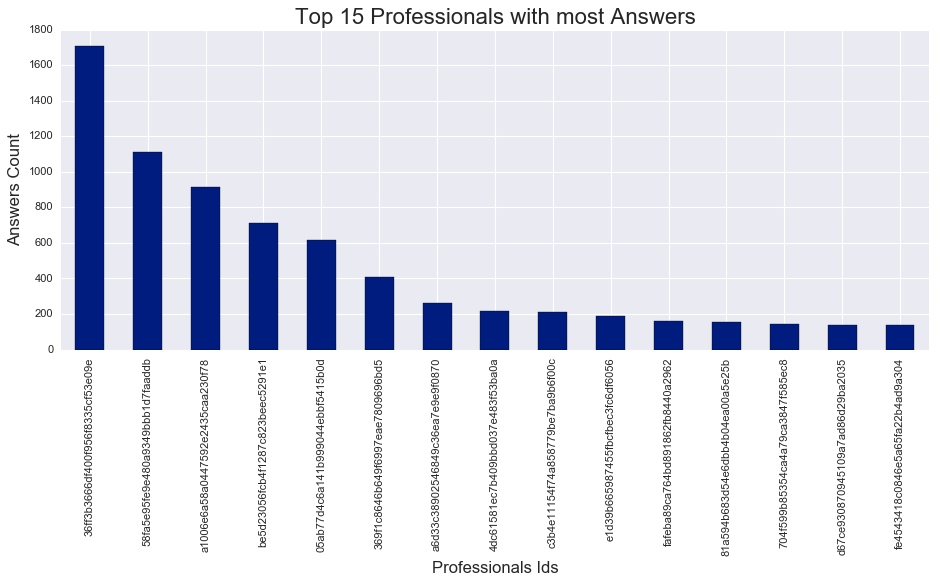

In [168]:
que_ans_prof.groupby(['professionals_id'])['answers_id'].size().sort_values(ascending=False).head(15).plot(kind='bar', figsize=(14, 5))
plt.xlabel('Professionals Ids', fontsize=15)
plt.ylabel('Answers Count', fontsize=15)
plt.title('Top 15 Professionals with most Answers', fontsize=20)
plt.show()

In [172]:
que_ans_prof.groupby(['professionals_id'])['answers_id'].size().sort_values(ascending=False).head(15).sum()

7073

In [173]:
7073 / 51123 * 100

13.835260059073216

## Result - 9 : Almost 40% of User doen't ask any questions at all

In [174]:
students.shape

(30971, 3)

In [184]:
len(questions.questions_author_id.unique())

12329

In [186]:
# Percentage
round(12329 / 30971 * 100)

40

## Result - 10 : Almost 36% of professionals doesn't answered any questions

In [191]:
professionals.shape

(28152, 11)

In [192]:
len(answers.answers_author_id.unique())

10169

In [193]:
round(10169 / 28152 * 100)

36

# Result - 11 : Activity features used in EDA - ( IMP )

User activities divided into 3 main categories:
- Answer
- Question
- Comment

In [187]:
# Last Answer
temp = answers.groupby('answers_author_id')['answers_date_added'].max()
professionals['date_last_answer'] = pd.merge(professionals, pd.DataFrame(temp.rename('last_answer')), left_on='professionals_id', right_index=True, how='left')['last_answer']
# First Answer
temp = answers.groupby('answers_author_id')['answers_date_added'].min()
professionals['date_first_answer'] = pd.merge(professionals, pd.DataFrame(temp.rename('first_answer')), left_on='professionals_id', right_index=True, how='left')['first_answer']
# Last Comment
temp = comments.groupby('comments_author_id')['comments_date_added'].max()
professionals['date_last_comment'] = pd.merge(professionals, pd.DataFrame(temp.rename('last_comment')), left_on='professionals_id', right_index=True, how='left')['last_comment']
# First Comment
temp = comments.groupby('comments_author_id')['comments_date_added'].min()
professionals['date_first_comment'] = pd.merge(professionals, pd.DataFrame(temp.rename('first_comment')), left_on='professionals_id', right_index=True, how='left')['first_comment']
# Last Activity
professionals['date_last_activity'] = professionals[['date_last_answer', 'date_last_comment']].max(axis=1)
# First Activity
professionals['date_first_activity'] = professionals[['date_first_answer', 'date_first_comment']].min(axis=1)

# Last activity (Question)
temp = questions.groupby('questions_author_id')['questions_date_added'].max()
students['date_last_question'] = pd.merge(students, pd.DataFrame(temp.rename('last_question')), left_on='students_id', right_index=True, how='left')['last_question']
# First activity (Question)
temp = questions.groupby('questions_author_id')['questions_date_added'].min()
students['date_first_question'] = pd.merge(students, pd.DataFrame(temp.rename('first_question')), left_on='students_id', right_index=True, how='left')['first_question']
# Last activity (Comment)
temp = comments.groupby('comments_author_id')['comments_date_added'].max()
students['date_last_comment'] = pd.merge(students, pd.DataFrame(temp.rename('last_comment')), left_on='students_id', right_index=True, how='left')['last_comment']
# First activity (Comment)
temp = comments.groupby('comments_author_id')['comments_date_added'].min()
students['date_first_comment'] = pd.merge(students, pd.DataFrame(temp.rename('first_comment')), left_on='students_id', right_index=True, how='left')['first_comment']
# Last activity (Total)
students['date_last_activity'] = students[['date_last_question', 'date_last_comment']].max(axis=1)
# First activity (Total)
students['date_first_activity'] = students[['date_first_question', 'date_first_comment']].min(axis=1)

In [197]:
questions.drop(columns='Year', inplace=True)

In [198]:
questions.head()

,questions_id,questions_author_id,questions_date_added,questions_title,questions_body,year
0,332a511f1569444485cf7a7a556a5e54,8f6f374ffd834d258ab69d376dd998f5,2016-04-26 11:14:26,Teacher career question,What is a maths teacher? what is a ma...,2016
1,eb80205482e4424cad8f16bc25aa2d9c,acccbda28edd4362ab03fb8b6fd2d67b,2016-05-20 16:48:25,I want to become an army officer. What can I d...,I am Priyanka from Bangalore . Now am in 10th ...,2016
2,4ec31632938a40b98909416bdd0decff,f2c179a563024ccc927399ce529094b5,2017-02-08 19:13:38,Will going abroad for your first job increase ...,I'm planning on going abroad for my first job....,2017
3,2f6a9a99d9b24e5baa50d40d0ba50a75,2c30ffba444e40eabb4583b55233a5a4,2017-09-01 14:05:32,To become a specialist in business management...,i hear business management is a hard way to ge...,2017
4,5af8880460c141dbb02971a1a8369529,aa9eb1a2ab184ebbb00dc01ab663428a,2017-09-01 02:36:54,Are there any scholarships out there for stude...,I'm trying to find scholarships for first year...,2017


# Building WordCloud

In [247]:
from wordcloud import WordCloud

In [213]:
tag_questions.head()

,tag_questions_tag_id,tag_questions_question_id
0,28930,cb43ebee01364c68ac61d347a393ae39
1,28930,47f55e85ce944242a5a347ab85a8ffb4
2,28930,ccc30a033a0f4dfdb2eb987012f25792
3,28930,e30b274e48d741f7bf50eb5e7171a3c0
4,28930,3d22742052df4989b311b4195cbb0f1a


In [214]:
tags.head()

,tags_tag_id,tags_tag_name
0,27490,college
1,461,computer-science
2,593,computer-software
3,27292,business
4,18217,doctor


In [215]:
tag_users.head()

,tag_users_tag_id,tag_users_user_id
0,593,c72ab38e073246e88da7e9a4ec7a4472
1,1642,8db519781ec24f2e8bdc67c2ac53f614
2,638,042d2184ee3e4e548fc3589baaa69caf
3,11093,c660bd0dc1b34224be78a58aa5a84a63
4,21539,8ce1dca4e94240239e4385ed22ef43ce


In [229]:
entities = [
    ('students', students),
    ('professionals', professionals),
    ('questions', questions)
]

dfs = []

for entity, df in entities:
    if entity == 'questions':
        df = tag_questions
        df = pd.merge(df, tags, left_on='tag_questions_tag_id', right_on='tags_tag_id')
    else:
        df = tag_users[tag_users['tag_users_user_id'].isin(df['{}_id'.format(entity)])]
        df = pd.merge(df, tags, left_on='tag_users_tag_id', right_on='tags_tag_id')

    df['entity_type'] = entity

    dfs.append(df)
dfs[0][0:5]

,tag_users_tag_id,tag_users_user_id,tags_tag_id,tags_tag_name,entity_type
0,8593,82cc74c0e18347e4b68b219e250eb10f,8593,scientist,students
1,8593,f3a5c976bec34f4289aa58938a837300,8593,scientist,students
2,8593,b3e73d394b19488b9c9ec13fcd7c43a7,8593,scientist,students
3,8593,59da5285144044c8a883fa9a6d40cd6a,8593,scientist,students
4,8593,d957ed2aac584dd79e3280ff679e818b,8593,scientist,students


In [230]:
plt_data = pd.concat(dfs)
plt_data.tail()

,entity_type,tag_questions_question_id,tag_questions_tag_id,tag_users_tag_id,tag_users_user_id,tags_tag_id,tags_tag_name
76548,questions,72affe86909d49c09761a1d376476c92,39183.0,NaN,NaN,39183,austria
76549,questions,5b86153f2b6c46a4801bb39e10e01281,39248.0,NaN,NaN,39248,weldernation
76550,questions,0946a81d511b48c58376fd59058d3b12,39249.0,NaN,NaN,39249,welder
76551,questions,b4de8ccfcd874481bfc80ceacb0caac8,39249.0,NaN,NaN,39249,welder
76552,questions,0946a81d511b48c58376fd59058d3b12,39250.0,NaN,NaN,39250,nation


In [231]:
plt_data = plt_data[['tags_tag_name', 'entity_type']].pivot_table(index='tags_tag_name', columns='entity_type', aggfunc=len, fill_value=0)

In [233]:
plt_data.head()

entity_type,professionals,questions,students
tags_tag_name,,,
#,2,0,0
#-advising,1,0,0
#-biotechnology,1,0,0
#-college,1,0,0
#-computer-industry,1,0,0


In [234]:
for entity, df in entities:
    plt_data[entity] = plt_data[entity] / len(df)

In [236]:
plt_data.head()

entity_type,professionals,questions,students
tags_tag_name,,,
#,0.000071,0.0,0.0
#-advising,0.000036,0.0,0.0
#-biotechnology,0.000036,0.0,0.0
#-college,0.000036,0.0,0.0
#-computer-industry,0.000036,0.0,0.0


In [240]:
plt_data['sum'] = (plt_data['professionals'] + plt_data['students'] + plt_data['questions'])


In [241]:
plt_data.head()

entity_type,professionals,questions,students,sum
tags_tag_name,,,,
college,0.042413,0.156450,0.015337,0.214199
telecommunications,0.111289,0.000251,0.000065,0.111604
career,0.018400,0.065438,0.005457,0.089295
business,0.037582,0.041327,0.006877,0.085786
medicine,0.011118,0.055326,0.006361,0.072805


In [242]:
plt_data = plt_data.sort_values(by='sum', ascending=False).drop(['sum'], axis=1).head(100)

In [243]:
plt_data.head()

entity_type,professionals,questions,students
tags_tag_name,,,
college,0.042413,0.156450,0.015337
telecommunications,0.111289,0.000251,0.000065
career,0.018400,0.065438,0.005457
business,0.037582,0.041327,0.006877
medicine,0.011118,0.055326,0.006361


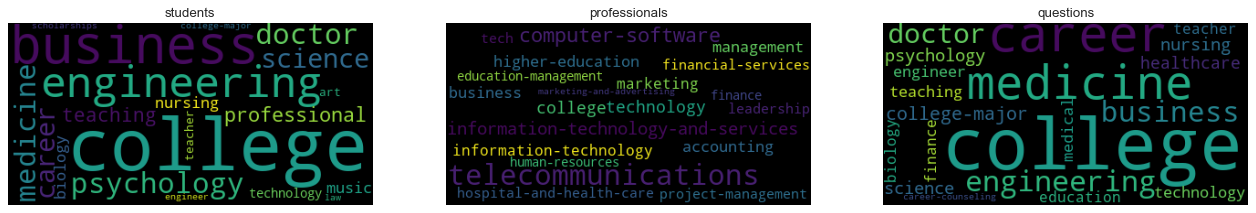

In [245]:
entities = [
    ('students', students),
    ('professionals', professionals),
    ('questions', questions)
]

dfs = []

for entity, df in entities:
    if entity == 'questions':
        df = tag_questions
        df = pd.merge(df, tags, left_on='tag_questions_tag_id', right_on='tags_tag_id')
    else:
        df = tag_users[tag_users['tag_users_user_id'].isin(df['{}_id'.format(entity)])]
        df = pd.merge(df, tags, left_on='tag_users_tag_id', right_on='tags_tag_id')

    df['entity_type'] = entity

    dfs.append(df)


plt_data = pd.concat(dfs)
plt_data = plt_data[['tags_tag_name', 'entity_type']].pivot_table(index='tags_tag_name', columns='entity_type', aggfunc=len, fill_value=0)

for entity, df in entities:
    plt_data[entity] = plt_data[entity] / len(df)

plt_data['sum'] = (plt_data['professionals'] + plt_data['students'] + plt_data['questions'])
plt_data = plt_data.sort_values(by='sum', ascending=False).drop(['sum'], axis=1).head(100)


# Wordcloud
plt.figure(figsize=(20, 20))
wordloud_values = ['students', 'professionals', 'questions']
axisNum = 1
for wordcloud_value in wordloud_values:
    wordcloud = WordCloud(margin=0, max_words=20, random_state=42).generate_from_frequencies(plt_data[wordcloud_value])
    ax = plt.subplot(1, 3, axisNum)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(wordcloud_value)
    plt.axis("off")
    axisNum += 1
plt.show()

# Relation among data

![Image](data_overview.png)